<a href="https://www.bigdatauniversity.com"><img src="https://ibm.box.com/shared/static/cw2c7r3o20w9zn8gkecaeyjhgw3xdgbj.png" width="400" align="center"></a>

<h1 align="center"><font size="5">Project: Whether a loan is paid off</font></h1>
<h2 align="center"><font size="5">Deadline: 2020-11-29 18:00:00</font></h2>
<h3 align="center"><font size="5"> Total marks: 6.0</font></h3>

### Your information:
- Fullname: Kiều Trí Đăng
- Date of birth: September 19th 1993
- Place of birth: Ho Chi Minh city
- Email: kieutridang@gmail.com
- Mobile phone: 0397979870

In this notebook, we practice all the knowledge and skills that we learned in this course.

We apply the **Regression Algorithm** to predict: "Whether a loan is paid off on in collection" by accuracy evaluation methods.

Lets first load required libraries:

In [1]:
import itertools
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.ticker as ticker
from sklearn import preprocessing
from termcolor import colored
from scipy.stats import chi2_contingency
from scipy.stats import chi2
import scipy
%matplotlib inline

### About dataset

This dataset is about past loans. The __Loan_train.csv__ data set includes details of 346 customers whose loan are already paid off or defaulted. It includes following fields:

| Field          | Description                                                                           |
|----------------|---------------------------------------------------------------------------------------|
| Loan_status    | Whether a loan is paid off on in collection                                           |
| Principal      | Basic principal loan amount at the                                                    |
| Terms          | Origination terms which can be weekly (7 days), biweekly, and monthly payoff schedule |
| Effective_date | When the loan got originated and took effects                                         |
| Due_date       | Since it’s one-time payoff schedule, each loan has one single due date                |
| Age            | Age of applicant                                                                      |
| Education      | Education of applicant                                                                |
| Gender         | The gender of applicant                                                               |

# Data exploration

### *** To predict "Whether a loan is paid off", we need some fields: 'Principal', 'Terms', 'Age', 'Gender', 'Effective_date' 
### The first things we need to do:
- Identify Variables 
- Univariate Analysis    
- Bi-variate Analysis
- Handle the Missing Values
- Handle Outlier Values

### Tips: Step by step like Chapter2_Ex1_Housing prices 

### Load Data From CSV File  

In [2]:
# Read CSV file: loan_train.csv
# code here
loan_train = pd.read_csv('./loan_train.csv')
loan_train.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,0,0,PAIDOFF,1000,30,9/8/2016,10/7/2016,45,High School or Below,male
1,2,2,PAIDOFF,1000,30,9/8/2016,10/7/2016,33,Bechalor,female
2,3,3,PAIDOFF,1000,15,9/8/2016,9/22/2016,27,college,male
3,4,4,PAIDOFF,1000,30,9/9/2016,10/8/2016,28,college,female
4,6,6,PAIDOFF,1000,30,9/9/2016,10/8/2016,29,college,male


In [3]:
loan_train = loan_train.loc[:, ~loan_train.columns.str.contains('^Unnamed')]

In [4]:
# Understanding to dataset
# shape
# info
# head(), tail()
# describe()
print('loan_train.shape', loan_train.shape)
print('---------------------------------------')
print('loan_train.info', loan_train.info())
print('---------------------------------------')
print(colored('loan_train.head', 'green'), loan_train.head())
print('---------------------------------------')
print('loan_train.tail', loan_train.tail())
print('---------------------------------------')
print('loan_train.describe\n', loan_train.describe())

loan_train.shape (346, 8)
---------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 346 entries, 0 to 345
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   loan_status     346 non-null    object
 1   Principal       346 non-null    int64 
 2   terms           346 non-null    int64 
 3   effective_date  346 non-null    object
 4   due_date        346 non-null    object
 5   age             346 non-null    int64 
 6   education       346 non-null    object
 7   Gender          346 non-null    object
dtypes: int64(3), object(5)
memory usage: 21.8+ KB
loan_train.info None
---------------------------------------
loan_train.head   loan_status  Principal  terms effective_date   due_date  age  \
0     PAIDOFF       1000     30       9/8/2016  10/7/2016   45   
1     PAIDOFF       1000     30       9/8/2016  10/7/2016   33   
2     PAIDOFF       1000     15       9/8/2016  9/22/2016   27  

### Nhận xét:
* có 4 dòng bị thiếu age
* không đáng kể nên là sẽ xóa luôn

### Convert 'due_date', 'effective_date' to date time object 

In [5]:
# code here
loan_train.due_date = pd.to_datetime(loan_train.due_date)
loan_train.effective_date = pd.to_datetime(loan_train.effective_date)

## Identify Variables

| Feature | Type of Variable | Data Type | Variable Category |
| :- | - | - | -: |
| loan_status | Target | Character | Categorical |
| Principal | Predictor | Numeric | Categorical |
| terms | Predictor | Numeric | Categorical |
| age | Predictor | Numeric | Continuous |
| gender | Predictor | Character | Categorical |
| effective_date | Predictor | Character | Categorical |

## Univariate Analysis

### Loan Status: Target, Character, Categorical

In [6]:
loan_status = loan_train.loan_status
loan_status.head()

0    PAIDOFF
1    PAIDOFF
2    PAIDOFF
3    PAIDOFF
4    PAIDOFF
Name: loan_status, dtype: object

<AxesSubplot:xlabel='loan_status', ylabel='count'>

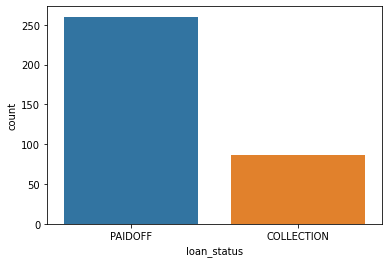

In [7]:
sns.countplot(loan_status)

### Principal: Predictor, Numeric, Categorical

In [8]:
principal = loan_train.Principal
principal.head()

0    1000
1    1000
2    1000
3    1000
4    1000
Name: Principal, dtype: int64

In [9]:
principal.describe()

count     346.000000
mean      943.641618
std       109.425530
min       300.000000
25%       900.000000
50%      1000.000000
75%      1000.000000
max      1000.000000
Name: Principal, dtype: float64

<AxesSubplot:xlabel='Principal'>

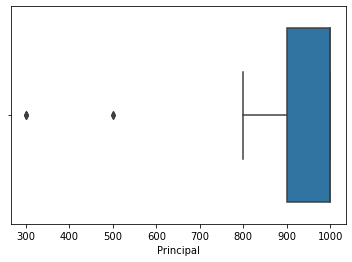

In [10]:
sns.boxplot(principal)

<AxesSubplot:xlabel='Principal', ylabel='Count'>

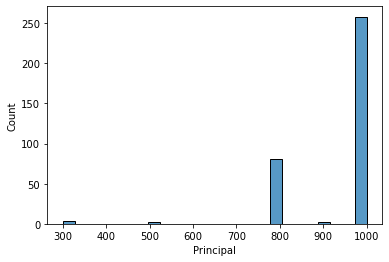

In [11]:
sns.histplot(principal)

<AxesSubplot:xlabel='Principal', ylabel='count'>

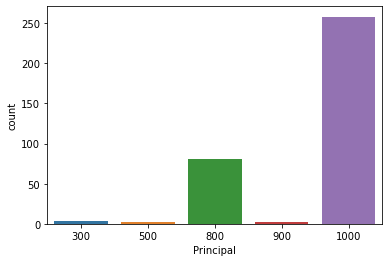

In [12]:
sns.countplot(principal)

### terms: Predictor, Numeric, Categorical

In [13]:
terms = loan_train.terms
terms.head()

0    30
1    30
2    15
3    30
4    30
Name: terms, dtype: int64

In [14]:
terms.describe()

count    346.000000
mean      22.653179
std        7.991006
min        7.000000
25%       15.000000
50%       30.000000
75%       30.000000
max       30.000000
Name: terms, dtype: float64

<AxesSubplot:xlabel='terms', ylabel='count'>

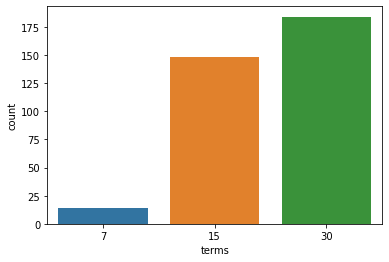

In [15]:
sns.countplot(terms)

### age: Predictor, Numeric, Continous

In [16]:
age = loan_train.age
age.head()

0    45
1    33
2    27
3    28
4    29
Name: age, dtype: int64

In [17]:
age.describe()

count    346.000000
mean      30.939306
std        6.039418
min       18.000000
25%       27.000000
50%       30.000000
75%       35.000000
max       51.000000
Name: age, dtype: float64

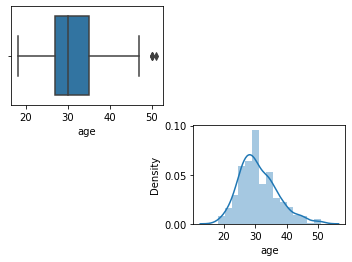

In [18]:
plt.subplot(2, 2, 1)
sns.boxplot(age)
plt.subplot(2, 2, 4)
sns.distplot(age)
plt.show()

In [19]:
age.skew()

0.700410003463071

In [20]:
age.kurtosis()

0.4810630956818449

In [21]:
print('mean:', age.mean())
print('median:', age.median())
print('mode:', age.mode())

mean: 30.939306358381504
median: 30.0
mode: 0    26
dtype: int64


#### Nhận xét:
* mean > median > mode: đồ thị lệch phải nhẹ

### gender: Predictor, Character, Categorical

In [22]:
gender = loan_train.Gender
gender.head()

0      male
1    female
2      male
3    female
4      male
Name: Gender, dtype: object

<AxesSubplot:xlabel='Gender', ylabel='count'>

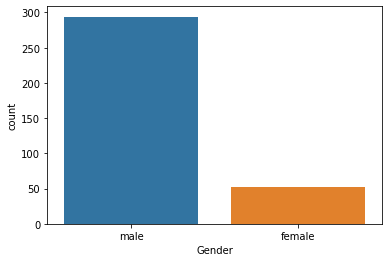

In [23]:
sns.countplot(gender)

### Effective_date: Predictor, Character, Categorical

In [24]:
loan_train.effective_date = pd.to_datetime(loan_train.effective_date)
loan_train.effective_date.value_counts()

effective_date = loan_train.effective_date

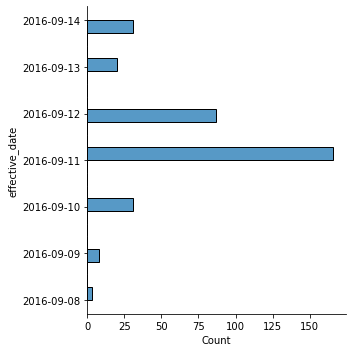

In [25]:
sns.displot(data=loan_train, y="effective_date")

## Bi-variate Analysis

In [26]:
def check_two_categorical_independent(var_1, var_2):
    table = pd.crosstab(var_1, var_2)
    print(table)
    table
    print("==========================================================")
    table.plot(kind="bar", stacked=True)
    stat, p, dof, expected = chi2_contingency(table)
    prob = 0.95
    critical = chi2.ppf(prob, dof)
    if (stat >= critical):
        print('2 biến không độc lập, có thể dùng principal để tìm ra loan_status được')
    else:
        print('2 biến độc lập, KHÔNG dùng principal để tìm ra loan_status được')

### loan_status vs Principal: (categorical vs categorical)

Principal    300   500   800   900   1000
loan_status                              
COLLECTION      0     0    18     0    68
PAIDOFF         3     2    63     2   190
2 biến độc lập, KHÔNG dùng principal để tìm ra loan_status được


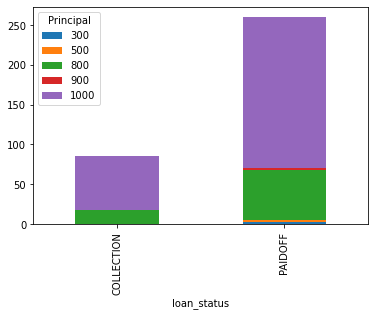

In [27]:
check_two_categorical_independent(loan_status, principal)

### loan_status vs terms: (categorical vs categorical)

terms        7    15   30
loan_status              
COLLECTION    0   34   52
PAIDOFF      14  114  132
2 biến không độc lập, có thể dùng principal để tìm ra loan_status được


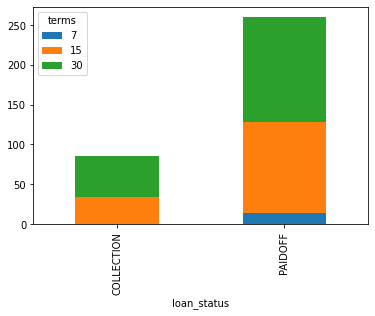

In [28]:
check_two_categorical_independent(loan_status, terms)

### loan_status vs gender: (categorical vs categorical)

Gender       female  male
loan_status              
COLLECTION        7    79
PAIDOFF          45   215
2 biến độc lập, KHÔNG dùng principal để tìm ra loan_status được


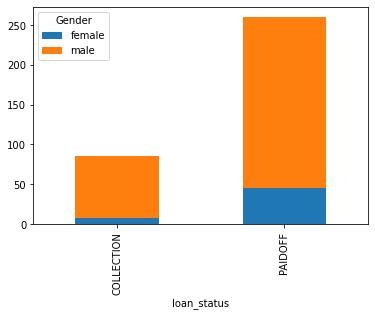

In [29]:
check_two_categorical_independent(loan_status, gender)

### loan_status vs effective_date: (categorical vs categorical)

effective_date  2016-09-08  2016-09-09  2016-09-10  2016-09-11  2016-09-12  \
loan_status                                                                  
COLLECTION               0           4          14          65           3   
PAIDOFF                  3           4          17         101          84   

effective_date  2016-09-13  2016-09-14  
loan_status                             
COLLECTION               0           0  
PAIDOFF                 20          31  
2 biến không độc lập, có thể dùng principal để tìm ra loan_status được


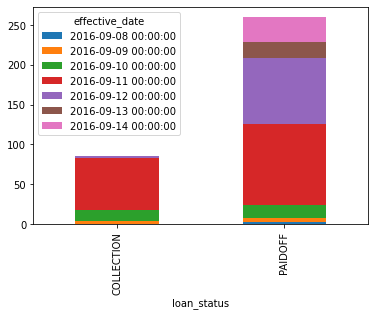

In [30]:
check_two_categorical_independent(loan_status, effective_date)

### loan_status vs age: (categorical vs continuous)

<AxesSubplot:xlabel='loan_status', ylabel='age'>

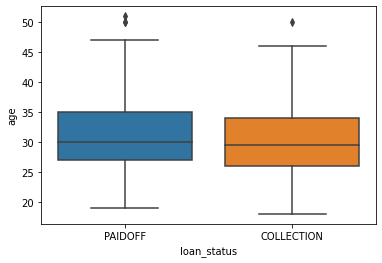

In [31]:
sns.boxplot(data=loan_train, x="loan_status", y="age")

In [32]:
table = pd.crosstab(loan_status, age)
table

age,18,19,20,21,22,23,24,25,26,27,...,40,41,42,43,44,45,46,47,50,51
loan_status,,,,,,,,,,,,,,,,,,,,,
COLLECTION,1,0,0,1,2,2,4,6,9,6,...,3,1,0,0,1,1,1,0,1,0
PAIDOFF,0,2,3,4,5,6,10,10,20,19,...,5,1,3,3,3,3,1,1,2,1


In [33]:
df_sub = loan_train[['loan_status', 'age']]
df_sub

,loan_status,age
0,PAIDOFF,45
1,PAIDOFF,33
2,PAIDOFF,27
3,PAIDOFF,28
4,PAIDOFF,29
...,...,...
341,COLLECTION,32
342,COLLECTION,25
343,COLLECTION,39
344,COLLECTION,28


In [34]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [35]:
model = ols('age ~ C(loan_status)', data=df_sub).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
anova_table

,sum_sq,df,F,PR(>F)
C(loan_status),9.502088,1.0,0.259954,0.610479
Residual,12574.223345,344.0,NaN,NaN


### Nhận xét:
* loan_status và age có liên hệ với nhau

## Handle Outlier Values

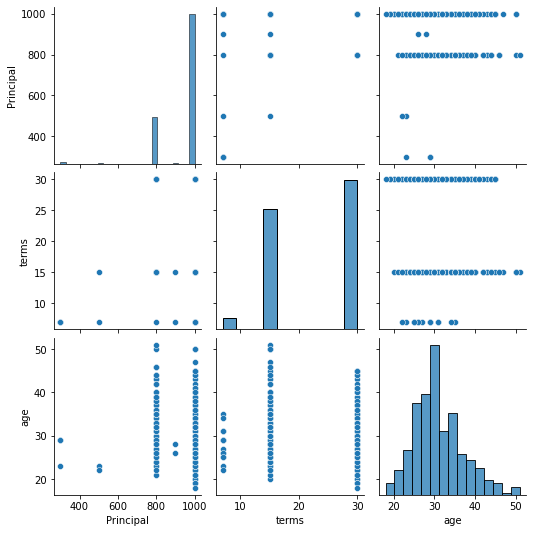

In [36]:
sns.pairplot(loan_train)

### Remove outlier of age

In [37]:
def remove_bottom_up_outliers(var):
    plt.boxplot(var)
    plt.title('before')
    plt.show()
    Q1 = np.percentile(var, 25)
    Q3 = np.percentile(var, 75)
    IQR = scipy.stats.iqr(var)
    var = var[(var <= Q3 + 1.5 * IQR) & (var >= Q1 - 1.5 * IQR)]
    plt.boxplot(var)
    plt.title('after')
    plt.show()
    return var

In [38]:
loan_train.count()

loan_status       346
Principal         346
terms             346
effective_date    346
due_date          346
age               346
education         346
Gender            346
dtype: int64

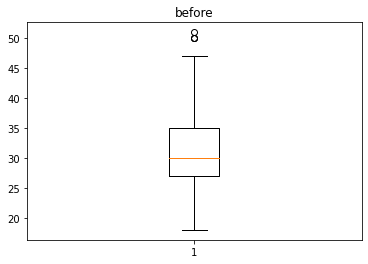

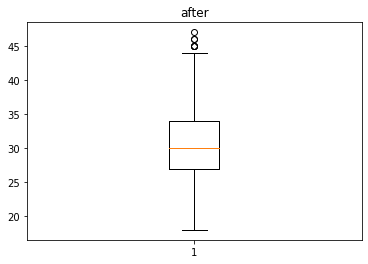

In [39]:
loan_train.age = remove_bottom_up_outliers(age)

In [40]:
loan_train.count()

loan_status       346
Principal         346
terms             346
effective_date    346
due_date          346
age               342
education         346
Gender            346
dtype: int64

### Nhận xét:
* Có 4 outliers đã bị bỏ nên là sẽ drop luôn các dòng liên quan

In [41]:
loan_train.dropna(
    axis=0,
    how='any',
    thresh=None,
    subset=None,
    inplace=True
)

# Data visualization

How many sample of each class is in our data set?

<AxesSubplot:xlabel='loan_status', ylabel='count'>

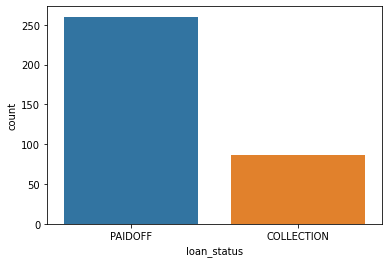

In [42]:
sns.countplot(loan_status)

### Explain:
* about 250 people have paid off the loan on  time
* mean while aboout 100 people have gone into collection

Lets plot some columns to underestand data better:
- Use seaborn or matplotlib to draw some plots like that:

In [43]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

In [44]:
img1 = np.array(Image.open('Principal_Male_Female.jpg'))

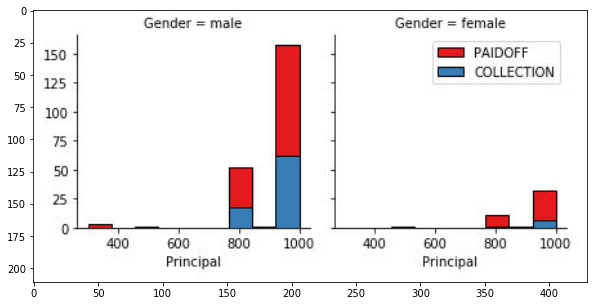

In [45]:
plt.figure(figsize=(10,5))
plt.imshow(img1, interpolation='bilinear')
plt.show()

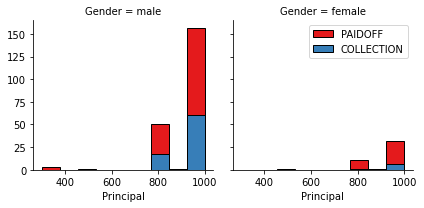

In [46]:
bins = np.linspace(loan_train.Principal.min(), loan_train.Principal.max(), 10)
g = sns.FacetGrid(loan_train, col="Gender", hue="loan_status", palette="Set1", col_wrap=2)
g.map(plt.hist, 'Principal', bins=bins, ec="k")

g.axes[-1].legend()
plt.show()

In [47]:
img2 = np.array(Image.open('Age_Male_Female.jpg'))

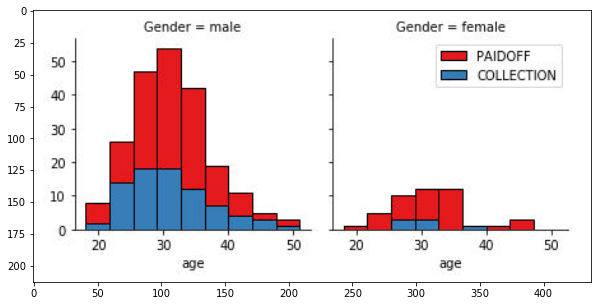

In [48]:
plt.figure(figsize=(10,5))
plt.imshow(img2, interpolation='bilinear')
plt.show()

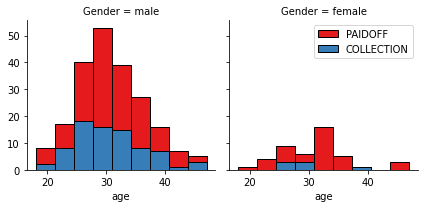

In [49]:
bins=np.linspace(loan_train.age.min(), loan_train.age.max(), 10)
g = sns.FacetGrid(loan_train, col="Gender", hue="loan_status", palette="Set1", col_wrap=2)
g.map(plt.hist, 'age', bins=bins, ec="k")

g.axes[-1].legend()
plt.show()

# Pre-processing:  Feature selection/extraction

### Lets look at the day of the week people get the loan 

- Make new column 'dayofweek' from 'effective_date'
    - Example: 2016-09-08 => dayofweek is 3 (The day of the week with Monday=0, Sunday=6)
    - Link: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DatetimeIndex.dayofweek.html

In [50]:
loan_train['dayofweek'] = loan_train['effective_date'].dt.dayofweek

Lets plot some columns to underestand data better:

In [51]:
img3 = np.array(Image.open('day_of_week.jpg'))

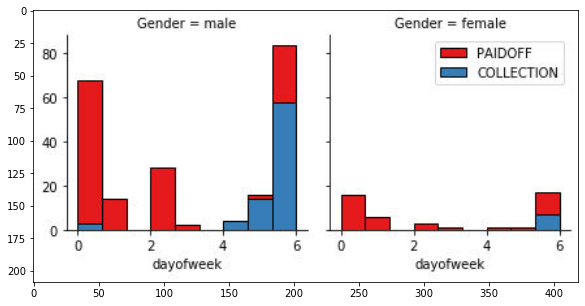

In [52]:
plt.figure(figsize=(10,5))
plt.imshow(img3, interpolation='bilinear')
plt.show()

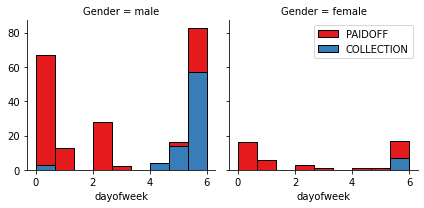

In [53]:
bins=np.linspace(loan_train.dayofweek.min(), loan_train.dayofweek.max(), 10)
g = sns.FacetGrid(loan_train, col="Gender", hue="loan_status", palette="Set1", col_wrap=2)
g.map(plt.hist, 'dayofweek', bins=bins, ec="k")
g.axes[-1].legend()
plt.show()

We see that people who get the loan at the end of the week don't pay it off, so lets use Feature binarization to set a threshold values less then day 4 
- Make new column 'weekend': =1 if 'dayofweek'>3, else =0

In [54]:
loan_train['weekend']= loan_train['dayofweek'].apply(lambda x: 1 if (x>3)  else 0)
loan_train.head()

,loan_status,Principal,terms,effective_date,due_date,age,education,Gender,dayofweek,weekend
0,PAIDOFF,1000,30,2016-09-08,2016-10-07,45.0,High School or Below,male,3,0
1,PAIDOFF,1000,30,2016-09-08,2016-10-07,33.0,Bechalor,female,3,0
2,PAIDOFF,1000,15,2016-09-08,2016-09-22,27.0,college,male,3,0
3,PAIDOFF,1000,30,2016-09-09,2016-10-08,28.0,college,female,4,1
4,PAIDOFF,1000,30,2016-09-09,2016-10-08,29.0,college,male,4,1


## Convert Categorical features to numerical values

- groupby 'Gender' and count by 'loan_status'

In [55]:
loan_train.groupby(['Gender'])['loan_status'].value_counts(normalize=True)

Gender  loan_status
female  PAIDOFF        0.865385
        COLLECTION     0.134615
male    PAIDOFF        0.731034
        COLLECTION     0.268966
Name: loan_status, dtype: float64

**68** % of female pay there loans while only **xxx** % of males pay there loan

Lets convert male to 0 and female to 1:


In [56]:
loan_train['Gender'].replace(to_replace=['male','female'], value=[0,1],inplace=True)
loan_train.head()


,loan_status,Principal,terms,effective_date,due_date,age,education,Gender,dayofweek,weekend
0,PAIDOFF,1000,30,2016-09-08,2016-10-07,45.0,High School or Below,0,3,0
1,PAIDOFF,1000,30,2016-09-08,2016-10-07,33.0,Bechalor,1,3,0
2,PAIDOFF,1000,15,2016-09-08,2016-09-22,27.0,college,0,3,0
3,PAIDOFF,1000,30,2016-09-09,2016-10-08,28.0,college,1,4,1
4,PAIDOFF,1000,30,2016-09-09,2016-10-08,29.0,college,0,4,1


## One Hot Encoding  
#### How about education?

- groupby 'education' and count by 'loan_status'

In [57]:
loan_train.groupby(['education'])['loan_status'].value_counts(normalize=True)

education             loan_status
Bechalor              PAIDOFF        0.750000
                      COLLECTION     0.250000
High School or Below  PAIDOFF        0.738255
                      COLLECTION     0.261745
Master or Above       PAIDOFF        1.000000
college               PAIDOFF        0.763514
                      COLLECTION     0.236486
Name: loan_status, dtype: float64

#### Feature befor One Hot Encoding
- Print head() data with 5 columns: 'Principal','terms','age','Gender','education'

In [58]:
loan_train[['Principal','terms','age','Gender','education']].head()

,Principal,terms,age,Gender,education
0,1000,30,45.0,0,High School or Below
1,1000,30,33.0,1,Bechalor
2,1000,15,27.0,0,college
3,1000,30,28.0,1,college
4,1000,30,29.0,0,college


#### Use one hot encoding technique to convert categorical varables to binary variables and append them to the feature Data Frame 

- Make new dataframe **Feature** has: 'Principal','terms','age','Gender','weekend', 'education'
- In **Feature**: Use one hot encoding technique to convert 'education' to binary variable, then drop column 'Master or Above'

In [59]:
Feature = loan_train[['Principal','terms','age','Gender']]
Feature = pd.concat([Feature,pd.get_dummies(loan_train['education'])], axis=1)
Feature.drop(['Master or Above'], axis = 1,inplace=True)
Feature.head()

,Principal,terms,age,Gender,Bechalor,High School or Below,college
0,1000,30,45.0,0,0,1,0
1,1000,30,33.0,1,1,0,0
2,1000,15,27.0,0,0,0,1
3,1000,30,28.0,1,0,0,1
4,1000,30,29.0,0,0,0,1


### Feature selection

Lets defind feature sets, X:
- X is input, X = Feature

In [60]:
X = Feature
X[0:5]

,Principal,terms,age,Gender,Bechalor,High School or Below,college
0,1000,30,45.0,0,0,1,0
1,1000,30,33.0,1,1,0,0
2,1000,15,27.0,0,0,0,1
3,1000,30,28.0,1,0,0,1
4,1000,30,29.0,0,0,0,1


What are our lables?
- y is output, y = 'loan_status' column

In [61]:
y = loan_train['loan_status'].values
y[0:5]

array(['PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF'],
      dtype=object)

## Normalize Data 

Data Standardization give data zero mean and unit variance (technically should be done after train test split )
- Find the suitable Scaler to scale data of X (if we need to do to have a better prediction)

In [62]:
X = preprocessing.StandardScaler().fit(X).transform(X)
X[0:5]

array([[ 0.51111009,  0.90913141,  2.51067071, -0.42345052, -0.38425383,
         1.13811336, -0.8734338 ],
       [ 0.51111009,  0.90913141,  0.40183064,  2.36155099,  2.6024464 ,
        -0.8786471 , -0.8734338 ],
       [ 0.51111009, -0.96993552, -0.6525894 , -0.42345052, -0.38425383,
        -0.8786471 ,  1.14490646],
       [ 0.51111009,  0.90913141, -0.47685273,  2.36155099, -0.38425383,
        -0.8786471 ,  1.14490646],
       [ 0.51111009,  0.90913141, -0.30111605, -0.42345052, -0.38425383,
        -0.8786471 ,  1.14490646]])

## Classification

In [63]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (273, 7) (273,)
Test set: (69, 7) (69,)


In [64]:
X_train

array([[ 0.51111009,  0.90913141,  0.75330398, ..., -0.38425383,
         1.13811336, -0.8734338 ],
       [ 0.51111009,  0.90913141, -0.30111605, ..., -0.38425383,
         1.13811336, -0.8734338 ],
       [ 0.51111009,  0.90913141,  2.51067071, ..., -0.38425383,
         1.13811336, -0.8734338 ],
       ...,
       [ 0.51111009,  0.90913141,  1.10477733, ..., -0.38425383,
        -0.8786471 ,  1.14490646],
       [ 0.51111009,  0.90913141, -0.6525894 , ..., -0.38425383,
        -0.8786471 ,  1.14490646],
       [ 0.51111009, -0.96993552,  0.05035729, ..., -0.38425383,
        -0.8786471 ,  1.14490646]])

In [65]:
from sklearn.neighbors import KNeighborsClassifier
k = 3
#Train Model and Predict  
kNN_model = KNeighborsClassifier(n_neighbors=k).fit(X_train,y_train)
kNN_model

KNeighborsClassifier(n_neighbors=3)

In [66]:
# Sanity check
yhat = kNN_model.predict(X_test)
yhat[0:5]

array(['PAIDOFF', 'COLLECTION', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF'],
      dtype=object)

In [67]:
# Best k
Ks=15
mean_acc=np.zeros((Ks-1))
std_acc=np.zeros((Ks-1))
ConfustionMx=[];
for n in range(1,Ks):
    
    #Train Model and Predict  
    kNN_model = KNeighborsClassifier(n_neighbors=n).fit(X_train,y_train)
    yhat = kNN_model.predict(X_test)
    
    
    mean_acc[n-1]=np.mean(yhat==y_test);
    
    std_acc[n-1]=np.std(yhat==y_test)/np.sqrt(yhat.shape[0])
mean_acc

array([0.68115942, 0.50724638, 0.68115942, 0.5942029 , 0.7826087 ,
       0.75362319, 0.7826087 , 0.79710145, 0.76811594, 0.76811594,
       0.76811594, 0.76811594, 0.76811594, 0.75362319])

In [68]:
# Building the model again, using k=7
from sklearn.neighbors import KNeighborsClassifier
k = 7
#Train Model and Predict  
kNN_model = KNeighborsClassifier(n_neighbors=k).fit(X_train,y_train)
kNN_model

KNeighborsClassifier(n_neighbors=7)

## Logistic Regression

In [69]:
from sklearn.linear_model import LogisticRegression
LR_model = LogisticRegression(C=0.01).fit(X_train,y_train)
LR_model

LogisticRegression(C=0.01)

In [70]:
yhat = LR_model.predict(X_test)
yhat

array(['PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF',
       'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF',
       'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF',
       'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF',
       'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF',
       'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF',
       'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF',
       'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF',
       'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF',
       'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF',
       'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF',
       'PAIDOFF', 'PAIDOFF', 'PAIDOFF'], dtype=object)

In [71]:
LR_model = LogisticRegression(C=0.01).fit(X_train,y_train)
LR_model

LogisticRegression(C=0.01)

## Model Evaluation

In [72]:
from sklearn.metrics import f1_score
from sklearn.metrics import log_loss

In [73]:
loan_test = pd.read_csv('./loan_test.csv')
loan_test.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,1,1,PAIDOFF,1000,30,9/8/2016,10/7/2016,50,Bechalor,female
1,5,5,PAIDOFF,300,7,9/9/2016,9/15/2016,35,Master or Above,male
2,21,21,PAIDOFF,1000,30,9/10/2016,10/9/2016,43,High School or Below,female
3,24,24,PAIDOFF,1000,30,9/10/2016,10/9/2016,26,college,male
4,35,35,PAIDOFF,800,15,9/11/2016,9/25/2016,29,Bechalor,male


In [74]:
loan_train.head()

,loan_status,Principal,terms,effective_date,due_date,age,education,Gender,dayofweek,weekend
0,PAIDOFF,1000,30,2016-09-08,2016-10-07,45.0,High School or Below,0,3,0
1,PAIDOFF,1000,30,2016-09-08,2016-10-07,33.0,Bechalor,1,3,0
2,PAIDOFF,1000,15,2016-09-08,2016-09-22,27.0,college,0,3,0
3,PAIDOFF,1000,30,2016-09-09,2016-10-08,28.0,college,1,4,1
4,PAIDOFF,1000,30,2016-09-09,2016-10-08,29.0,college,0,4,1


In [75]:
loan_test = loan_test.loc[:, ~loan_test.columns.str.contains('^Unnamed')]
loan_test['due_date'] = pd.to_datetime(loan_test['due_date'])
loan_test['effective_date'] = pd.to_datetime(loan_test['effective_date'])
loan_test['dayofweek'] = loan_test['effective_date'].dt.dayofweek
loan_test['Gender'].replace(to_replace=['male','female'], value=[0,1],inplace=True)
test_Feature = loan_test[['Principal','terms','age','Gender']]
test_Feature = pd.concat([test_Feature,pd.get_dummies(loan_test['education'])], axis=1)
test_Feature.drop(['Master or Above'], axis = 1,inplace=True)
test_X = preprocessing.StandardScaler().fit(test_Feature).transform(test_Feature)
test_X[0:5]

array([[ 0.49362588,  0.92844966,  3.05981865,  1.97714211,  2.39791576,
        -0.79772404, -0.86135677],
       [-3.56269116, -1.70427745,  0.53336288, -0.50578054, -0.41702883,
        -0.79772404, -0.86135677],
       [ 0.49362588,  0.92844966,  1.88080596,  1.97714211, -0.41702883,
         1.25356634, -0.86135677],
       [ 0.49362588,  0.92844966, -0.98251057, -0.50578054, -0.41702883,
        -0.79772404,  1.16095912],
       [-0.66532184, -0.78854628, -0.47721942, -0.50578054,  2.39791576,
        -0.79772404, -0.86135677]])

In [79]:
test_y = loan_test['loan_status'].values
test_y[0:5]

array(['PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF'],
      dtype=object)

In [81]:
knn_yhat = kNN_model.predict(test_X)
print("KNN F1-score: %.2f" % f1_score(test_y, knn_yhat, average='weighted') )

KNN F1-score: 0.63


In [80]:
LR_yhat = LR_model.predict(test_X)
LR_yhat_prob = LR_model.predict_proba(test_X)
print("LR F1-score: %.2f" % f1_score(test_y, LR_yhat, average='weighted') )
print("LR LogLoss: %.2f" % log_loss(test_y, LR_yhat_prob))

LR F1-score: 0.63
LR LogLoss: 0.57
